# Random Variables

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import toolz as tz
import re

## Using `numpy.random`

### Setting seed for reproducibility

In [2]:
np.random.seed(123)

### Standard uniform

In [3]:
np.random.rand(3,4)

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477],
       [0.71946897, 0.42310646, 0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, 0.72904971]])

### Standard normal

In [4]:
np.random.randn(3, 4)

array([[-0.67888615, -0.09470897,  1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128,  2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ,  0.73736858,  1.49073203]])

### Parameterized distributions

Parameterized distribution functions typically have one or more of location, scale, shape or other parameters that can be specified.

#### Continuous  distributions

In [5]:
np.random.uniform(low=-1, high=1, size=(3, 4))

array([[ 0.44488677, -0.35408217, -0.27642269, -0.54347354],
       [-0.41257191,  0.26195225, -0.81579012, -0.13259765],
       [-0.13827447, -0.0126298 , -0.14833942, -0.37547755]])

In [6]:
np.random.normal(loc=100, scale=15, size=(3, 4))

array([[113.91193648,  97.39546476, 100.04268874, 110.32334067],
       [ 86.80695485, 104.25440986,  87.91950223,  74.08495759],
       [ 94.13650309, 108.60708794, 105.07883576,  99.82254258]])

In [7]:
np.random.standard_t(df=3, size=(3,4))

array([[ 2.26603603,  0.26443366, -2.62014171,  0.73989909],
       [ 0.52766961,  0.84688526, -0.63048839, -0.92233841],
       [ 1.15114019,  0.67780629,  0.82852178,  0.30139753]])

In [8]:
np.random.beta(a=0.5, b=0.5, size=(10,))

array([0.9853416 , 0.36941327, 0.17888099, 0.42376794, 0.12553194,
       0.32966061, 0.37205691, 0.39564619, 0.19150945, 0.83135736])

#### Discrete distributions

In [9]:
np.random.poisson(lam=10, size=(10,))

array([ 8,  8, 11, 15,  8,  7, 13, 12,  9,  9])

In [10]:
np.random.binomial(n=10, p=0.6, size=(10,))

array([8, 7, 4, 6, 6, 5, 5, 8, 5, 4])

In [11]:
np.random.negative_binomial(n=10, p=0.6, size=(10,))

array([10,  8,  3,  0,  6,  6,  4,  6,  3,  5])

In [12]:
np.random.geometric(p=0.6, size=(10,))

array([2, 1, 1, 5, 1, 1, 1, 4, 1, 2])

#### Multivariate distributions

In [13]:
np.random.multinomial(4, [0.1, 0.2, 0.3, 0.4], size=5)

array([[1, 0, 1, 2],
       [1, 0, 1, 2],
       [2, 1, 1, 0],
       [0, 0, 2, 2],
       [0, 3, 0, 1]])

In [14]:
np.random.multivariate_normal([10, 10], np.array([[3, 0.5], [0.5, 2]]), 5)

array([[12.36034662, 10.17775889],
       [10.59100147,  9.72067176],
       [ 9.14425098,  7.58936076],
       [12.13627781,  8.89252357],
       [11.98365842, 11.00145391]])

## Using `scipy.stats`

### Example: modeling IQ

Suppose IQ is normally distributed with a mean of 0 and a standard deviation of 15.

In [15]:
dist = stats.norm(loc=100, scale=15)

#### Random variates

In [16]:
dist.rvs(10)

array([ 75.993392  , 111.30803168,  96.29776335, 101.03182499,
       104.83865107,  93.4875022 , 115.48719574,  97.0848591 ,
       108.91105383,  97.01331426])

In [17]:
xs = np.linspace(50, 150, 100)

#### PDF

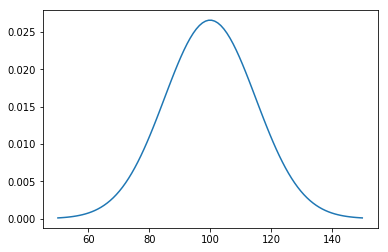

In [18]:
plt.plot(xs, dist.pdf(xs))
pass

#### CDF

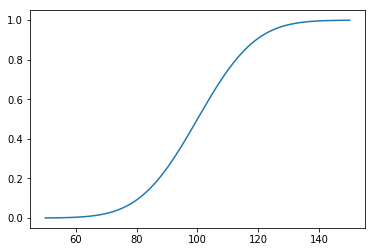

In [19]:
plt.plot(xs, dist.cdf(xs))
pass

#### Percentiles

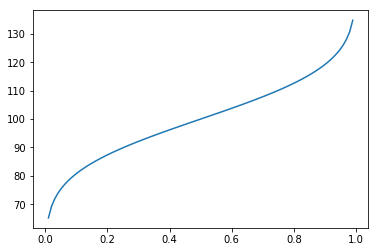

In [20]:
cdf = np.linspace(0, 1, 100)
plt.plot(cdf, dist.ppf(cdf))
pass

In [21]:
data = np.random.normal(110, 15, 100)

### Exercises

**1**. If your IQ is 138, what percentage of the population has a higher IQ?

In [22]:
dist = stats.norm(loc=100, scale=15)

In [23]:
100 * (1 - dist.cdf(138))

0.564917275556065

#### Via simulation

In [24]:
n = int(1e6)
samples = dist.rvs(n)

In [25]:
np.sum(samples > 138)/n

0.005694

**2**. If your IQ is at the 88th percentile, what is your IQ?

In [26]:
dist.ppf(0.88)

117.62480188099136

#### Via simulation

In [27]:
samples = np.sort(samples)
samples[int(0.88*n)]

117.64414143475878

**3**. What proportion of the population has IQ between 70 and 90?

In [28]:
dist.cdf(90) - dist.cdf(70)

0.2297424055987437

#### Via simulation

In [29]:
np.sum((samples > 70) & (samples < 90))/n

0.229646

#### MLE fit and confidence intervals

In [30]:
loc, scale = stats.norm.fit(data)
loc, scale

(108.96374136407888, 14.530161983813496)

In [31]:
dist = stats.norm(loc, scale)

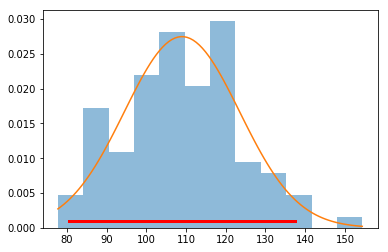

In [32]:
xs = np.linspace(data.min(), data.max(), 100)
plt.hist(data, 12, histtype='stepfilled', normed=True, alpha=0.5)
plt.plot(xs, dist.pdf(xs))
plt.plot(dist.interval(0.95), [0.001, 0.001], c='r', linewidth=3)
pass

## Sampling

### Without replication

In [33]:
np.random.choice(range(10), 5, replace=False)

array([6, 7, 5, 4, 0])

### With replication

In [34]:
np.random.choice(range(10), 15)

array([9, 0, 4, 0, 5, 7, 2, 3, 1, 7, 8, 6, 0, 8, 2])

### Example

- How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
- What if the coin is biased to generate heads only 40% of the time?

In [35]:
expts = 1000
tosses = 100

#### We assume that 0 maps to T and 1 to H

In [36]:
xs = np.random.choice([0,1], (expts, tosses))

#### For biased coin

In [37]:
ys = np.random.choice([0,1], (expts, tosses), p=[0.6, 0.4])

#### Using a finite state machine

In [38]:
runs = 0
for x in xs:
    m = 0
    for i in x:
        if i == 1:
            m += 1
            if m >=5:
                runs += 1
                break
        else:
            m = 0
runs

807

#### Using `partitionby`

In [39]:
runs = 0
for x in xs:
    parts = tz.partitionby(lambda i: i==1, x)
    for part in parts:
        if part[0] == 1 and len(part) >= 5:
            runs += 1
            break
runs

807

#### Using sliding windows

In [40]:
runs = 0
for x in xs:
    for w in tz.sliding_window(5, x):
        if np.sum(w) == 5:
            runs += 1
            break
runs

807

#### Using a regular expression

In [41]:
xs = xs.astype('str')

In [42]:
runs = 0
for x in xs:
    if (re.search(r'1{5,}', ''.join(x))):
        runs += 1
runs

807